# 1. Data loading and basic information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
df_train = df_train.drop(['id'], axis=1)

# 2. Data visualization

In [7]:
num_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df_train.select_dtypes(include='object').columns
print("numeric columns: ", num_columns)
print("catagorical columns: ", cat_columns)

numeric columns:  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')
catagorical columns:  Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [8]:
df_train[cat_columns].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [9]:
def make_barplot(df):
    cat_columns = df.select_dtypes(include='object').columns
    for column in cat_columns:
        plt.figure(figsize=(10, 5))
        uni_count = df[column].value_counts()
        sns.barplot(x=uni_count.index, y=uni_count.values)
        plt.ylabel(f"Count of '{column}'")
        plt.xlabel(f"{column}")
        plt.title(f"Count of unique categories in column '{column}'")
        plt.show()

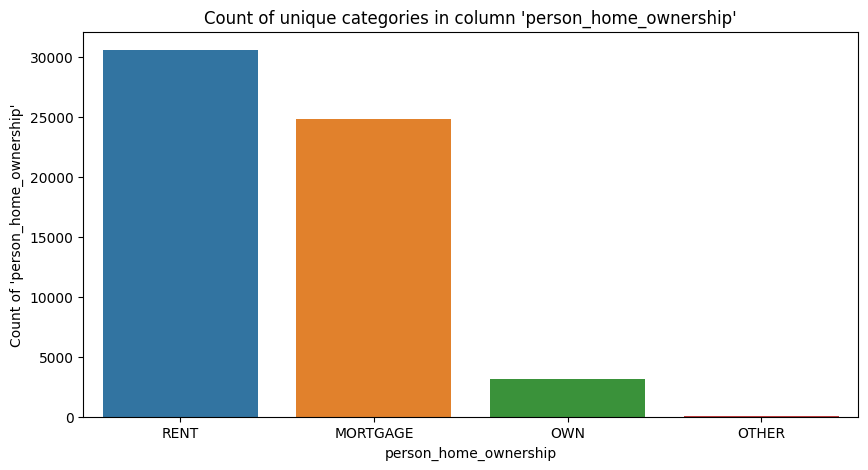

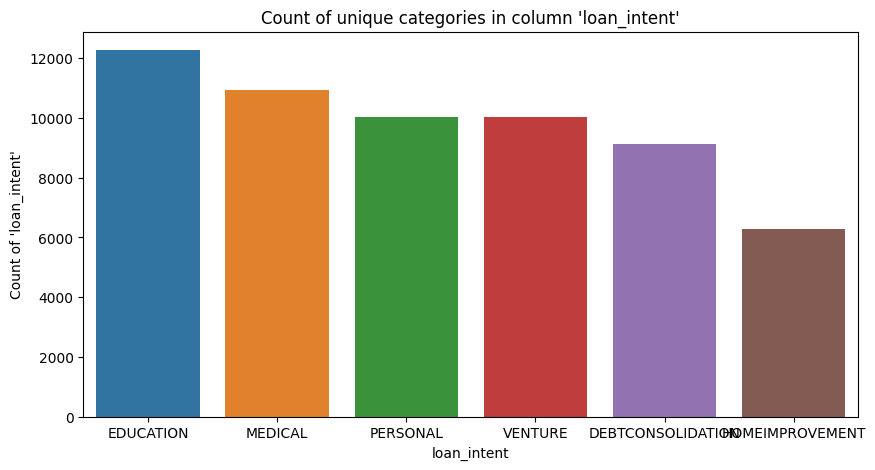

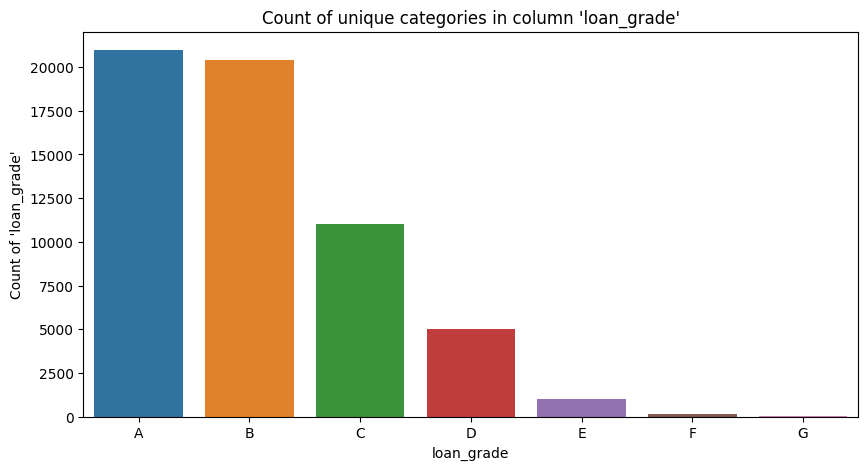

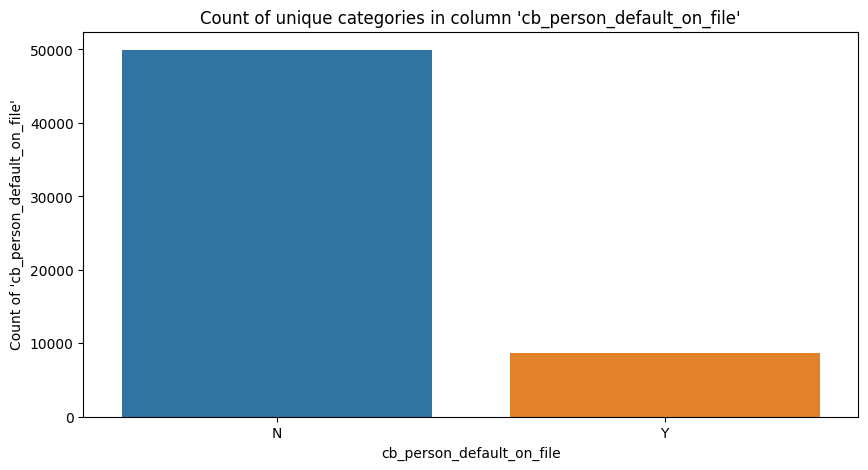

In [10]:
make_barplot(df_train)

In [11]:
df_train['loan_status'].unique()

array([0, 1])

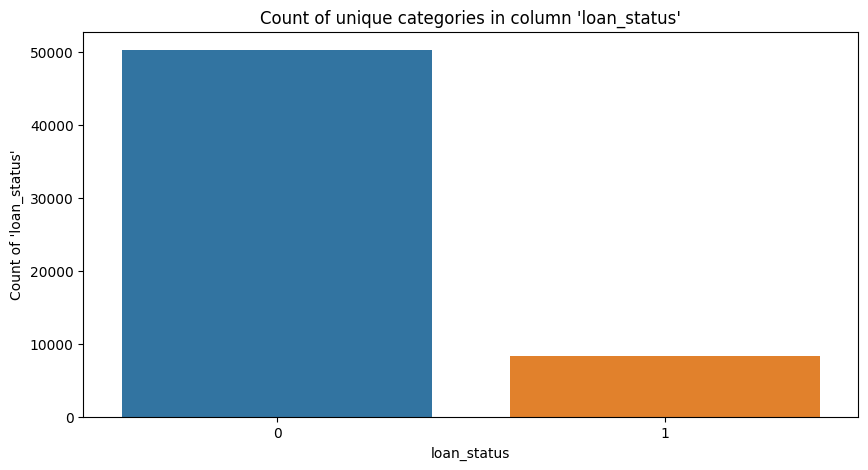

In [12]:
plt.figure(figsize=(10, 5))
uni_count = df_train['loan_status'].value_counts()
sns.barplot(x=uni_count.index, y=uni_count.values)
plt.ylabel("Count of 'loan_status'")
plt.xlabel("loan_status")
plt.title("Count of unique categories in column 'loan_status'")
plt.show()

In [13]:
def make_hist(df):
    num_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in num_columns:
        if column != 'loan_status':
            value0 = df[df['loan_status']== 0][column].to_numpy()
            value1 = df[df['loan_status']== 1][column].to_numpy()
            fig, ax = plt.subplots(figsize=(10,5))
            ax.hist(value0, bins=30, density=True, label='0')
            ax.hist(value1, bins=30, density=True, label='1')
            ax.legend()
            ax.set_xlabel(f'{column}')
            ax.set_ylabel('Fraction of data')
            plt.show()

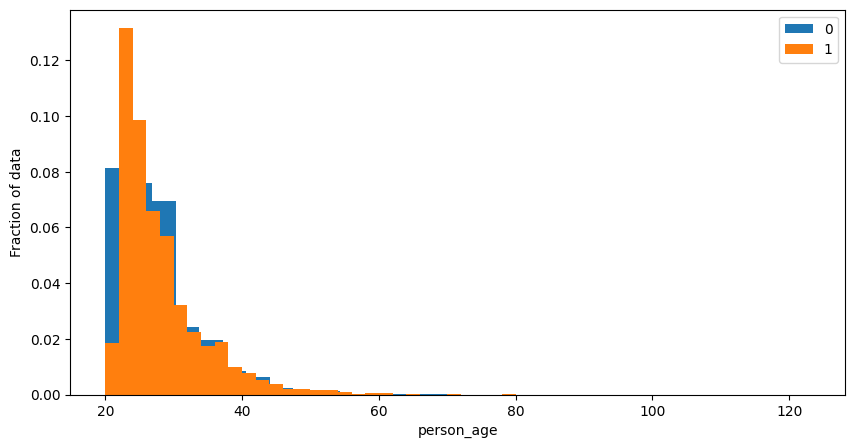

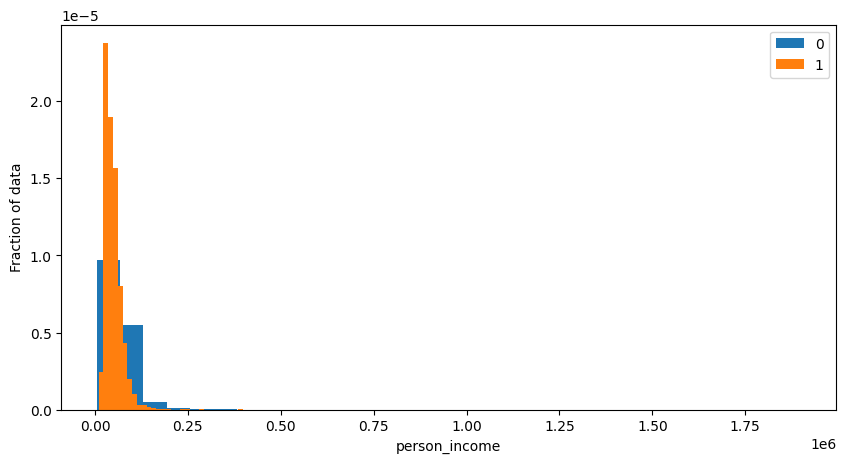

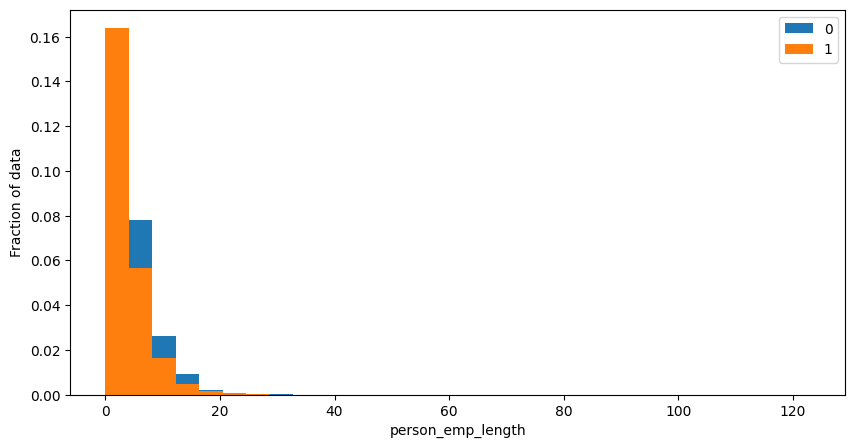

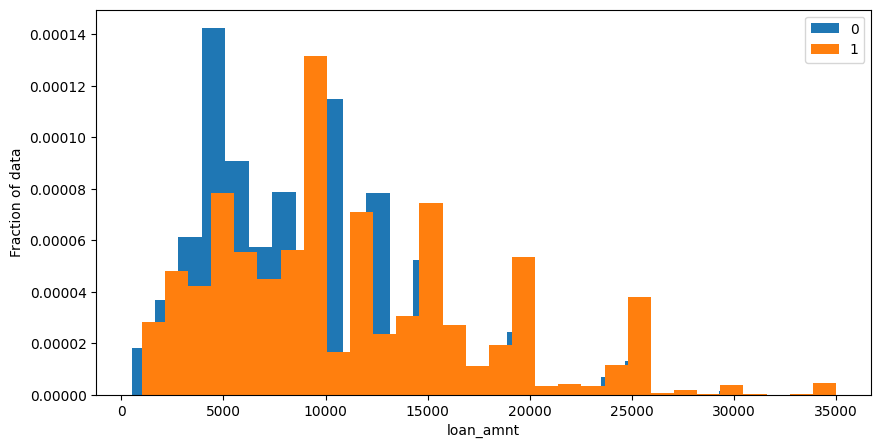

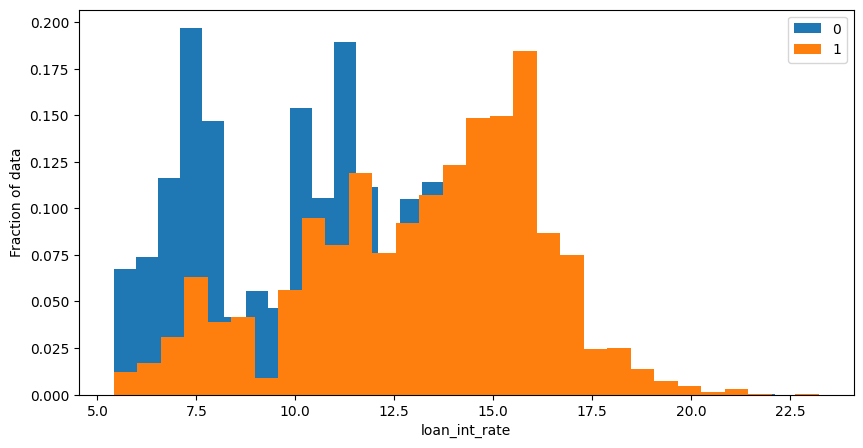

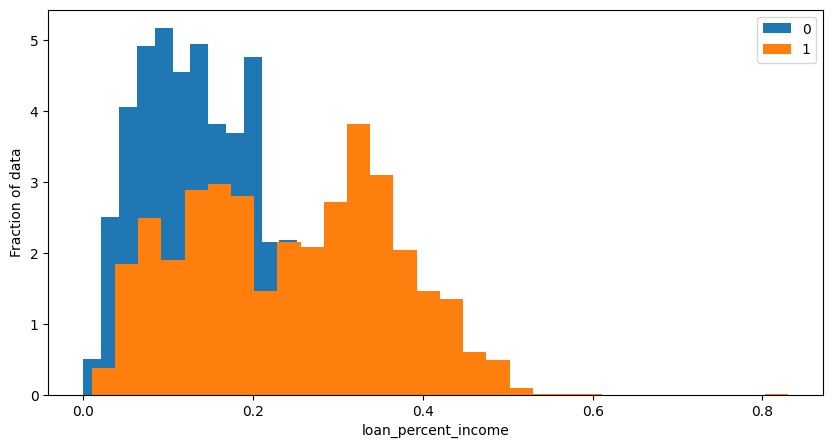

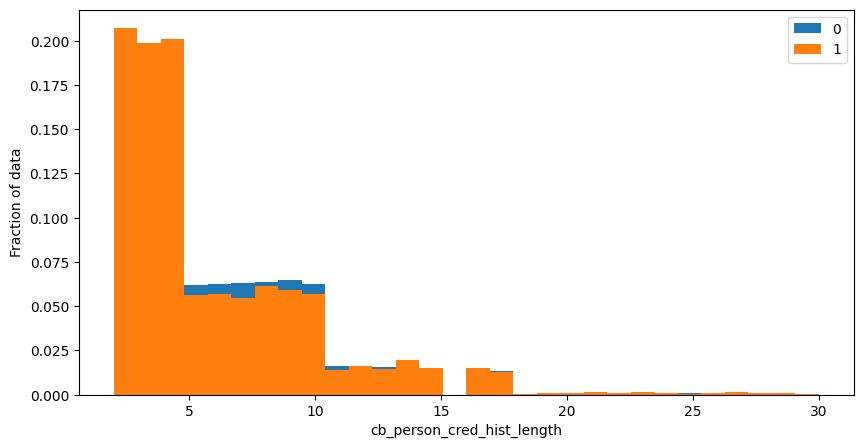

In [14]:
make_hist(df_train)

# 3. Preprocessing

In [15]:
X_train = df_train.drop(['loan_status'], axis=1)
y_train = df_train['loan_status']
X_test = df_test.drop(['id'], axis=1)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

def preprocess(df):
    cat_columns = df.select_dtypes(include='object').columns
    
    encoder = OrdinalEncoder()
    df[cat_columns] = encoder.fit_transform(df[cat_columns].astype(str))
    
    return df

In [17]:
X_train = preprocess(X_train)
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,3.0,0.0,1.0,1.0,6000,11.49,0.17,0.0,14
1,22,56000,2.0,6.0,3.0,2.0,4000,13.35,0.07,0.0,2
2,29,28800,2.0,8.0,4.0,0.0,6000,8.90,0.21,0.0,10
3,30,70000,3.0,14.0,5.0,1.0,12000,11.11,0.17,0.0,5
4,22,60000,3.0,2.0,3.0,0.0,6000,6.92,0.10,0.0,3


In [18]:
X_test = preprocess(X_test)

# 4. Model

In [19]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.20,
    random_state=1
)

In [20]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

def objective(trial):
    xgb_params = dict(
        objective='binary:logistic', 
        eval_metric='auc', 
        device = "cuda",
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 100, 2000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    
    model = XGBClassifier(**xgb_params)
    model.fit(X_train_new, y_train_new)
    
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_pred_proba)
    
    return score

In [21]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
xgb_params = study.best_params

[I 2024-10-03 05:54:11,398] A new study created in memory with name: no-name-8aa82489-8933-449d-bd6f-a7c53334ee5f
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:54:13] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
[I 2024-10-03 05:54:13,522] Trial 0 finished with value: 0.9085632894076192 and parameters: {'max_depth': 2, 'learning_rate': 0.0005773167416073904, 'n_estimators': 1392, 'min_child_weight': 8, 'colsample_bytree': 0.38636153681711516, 'subsample': 0.6516006333214146, 'reg_alpha': 0.003910939168802176, 'reg_lambda': 0.00449072053

# 5. Predictions

In [22]:
best_model = XGBClassifier(**xgb_params)
best_model.fit(X_train_new, y_train_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7433312751448186, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.011794184432084142,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1842, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = best_model.predict_proba(X_test)[:, 1]

In [24]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e10/sample_submission.csv")

In [25]:
submission['loan_status'] = y_pred

In [26]:
submission.to_csv('submission.csv', index=False)